In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#We have divided the csv file into two files one for traning and other for testing
#Note that the testing file includes atleast one sample of each of the 41 diseases to be considered

df=pd.read_csv("Processed Data\Train_data.csv")
# print(df.head())

symptoms = list(df.columns)
symptoms = symptoms[:-1]
print("Number of Symptoms: ",len(symptoms))
print(symptoms)

Number of Symptoms:  132
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_hear

In [12]:
#Getting the list of diseases
dis_col = list(df.iloc[:,-1])
diseases=df['prognosis'].unique()
        
print("Number of Diseases: ",len(diseases))
print(diseases)


Number of Diseases:  41
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox' 'Dengue'
 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C' 'Hepatitis D'
 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis' 'Common Cold'
 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack' 'Varicose veins'
 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia' 'Osteoarthristis'
 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo' 'Acne'
 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [13]:
#Getting a identifier for each of the disease to be classified

dis_num = {}
assign=0
for disease in diseases:
    dis_num.update({disease : assign})
    assign +=1

print(dis_num)

#Replace disease name by its identifier in the database
df["prognosis"].replace(dis_num,inplace=True)

{'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4, 'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes': 7, 'Gastroenteritis': 8, 'Bronchial Asthma': 9, 'Hypertension': 10, 'Migraine': 11, 'Cervical spondylosis': 12, 'Paralysis (brain hemorrhage)': 13, 'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16, 'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19, 'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Alcoholic hepatitis': 24, 'Tuberculosis': 25, 'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28, 'Heart attack': 29, 'Varicose veins': 30, 'Hypothyroidism': 31, 'Hyperthyroidism': 32, 'Hypoglycemia': 33, 'Osteoarthristis': 34, 'Arthritis': 35, '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37, 'Urinary tract infection': 38, 'Psoriasis': 39, 'Impetigo': 40}


In [14]:
#Training dataset

X_train = df.iloc[:,:-1]
Y_train = df.iloc[:,-1]
print(X_train.head())
print(Y_train.head())
print(X_train.shape)

m_train, n_train = X_train.shape

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        0          1                     1                    0          0   
1        1          0                     1                    0          0   
2        1          1                     0                    0          0   
3        1          1                     1                    0          0   
4        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...          pus_filled_pimples  blackheads  scurring  skin_peeling  \
0        ...                           0        

In [15]:
#Testing dataset

df_test = pd.read_csv("Processed Data\Test_data.csv")
df_test["prognosis"].replace(dis_num,inplace=True)

X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[:,-1]
print(X_test.head())
print(Y_test.head())
print(X_test.shape)

m_test,n_test = X_test.shape


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

         ...          pus_filled_pimples  blackheads  scurring  skin_peeling  \
0        ...                           0        

In [16]:
#Using Gaussian naive bayes to predict disease based on symptoms

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

gnb = GaussianNB()
gnb=gnb.fit(X_train,Y_train)

y_pred_gnb=gnb.predict(X_test)

correct=0
wrong=0
for i in range(len(y_pred_gnb)):
    if y_pred_gnb[i]==Y_test[i]:
        correct+=1
    else:
        wrong+=1
    
print("Accuracy: ", correct /len(y_pred_gnb))
print("Analysis: ",classification_report(y_true = Y_test.values, y_pred = y_pred_gnb))
print(accuracy_score(Y_test, y_pred_gnb,normalize=False))


Accuracy:  1.0
Analysis:               precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       1.00      1.00      1.00         1
         17       1

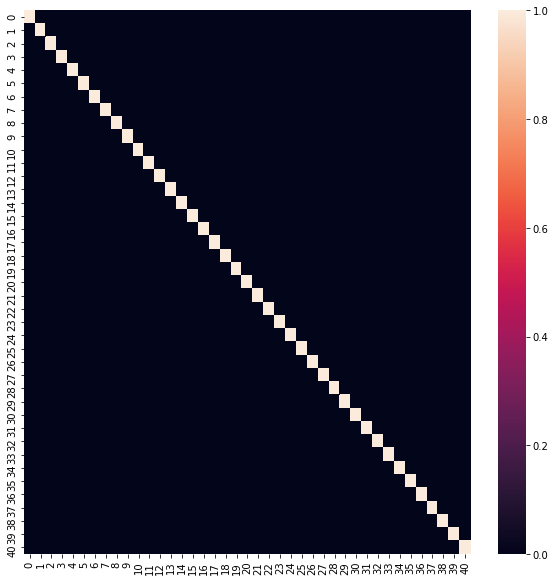

In [17]:

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(y_true = Y_test.values, y_pred = y_pred_gnb), ax = ax)
plt.show()

In [18]:
#Using decision tree classifier to predict disease based on symptoms

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


tree1=DecisionTreeClassifier(random_state=0,max_depth=43)
tree1.fit(X_train, Y_train)
Y_pred=tree1.predict(X_test)

correct=0
wrong=0
for i in range(len(Y_pred)):
    if Y_pred[i]==Y_test[i]:
        correct+=1
    else:
        wrong+=1
    
print( correct /len(Y_pred))


1.0


In [19]:
tree1.feature_importances_

array([ 0.00244422,  0.00445375,  0.0213261 ,  0.        ,  0.00248341,
        0.02421819,  0.        ,  0.00233313,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02041552,  0.00349035,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02401399,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02134175,
        0.04644357,  0.        ,  0.00244422,  0.        ,  0.        ,
        0.        ,  0.00244422,  0.        ,  0.02264813,  0.        ,
        0.        ,  0.02552553,  0.        ,  0.        ,  0.001287  ,
        0.02404499,  0.02552553,  0.        ,  0.01173371,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02552553,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02307219,  0.        ,  0.        ,  0.02410737,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02378028,
        0.        ,  0.        ,  0.        ,  0.02406998,  0.  

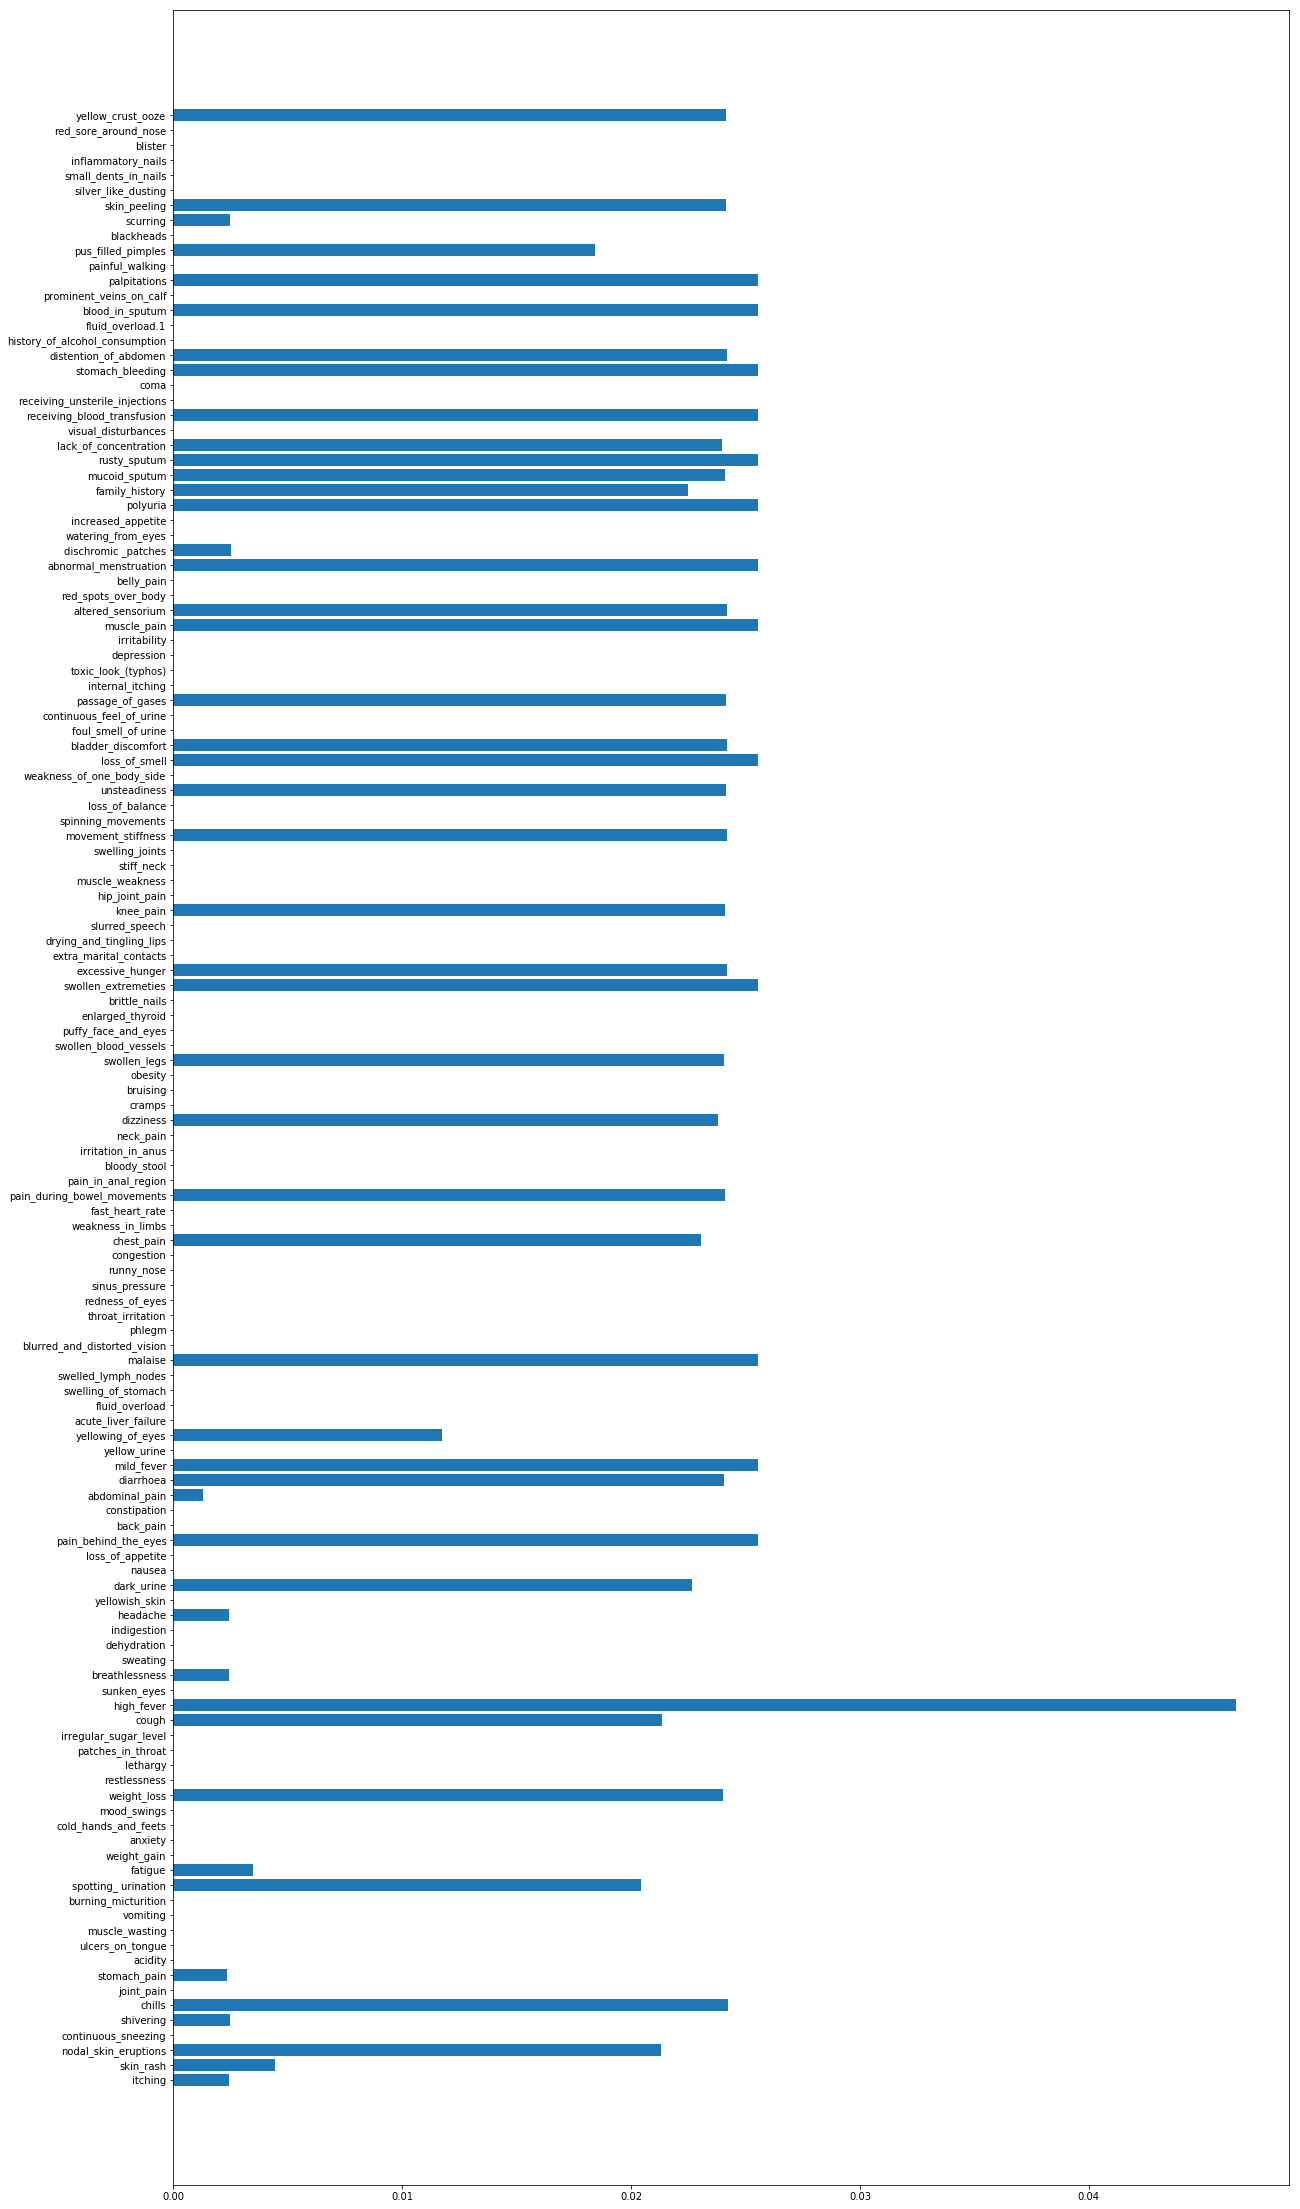

In [ ]:
def plot_symptom_feature(model):
    n_features = len(symptoms)
    plt.figure(figsize=(20,40))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), symptoms)
    plt.show()
    
plot_symptom_feature(tree1)
    

In [ ]:
# analysis for individual patient

s1 = input("Symptom 1: ")
s2 = input("Symptom 2: ")
s3 = input("Symptom 3: ")
s4 = input("Symptom 4: ")

s_patient  = [s1,s2,s3,s4]
print("Patient Symptoms", s_patient)

#Creating symptom input for testing
patient_sym=[]
for i in range(0,len(symptoms)):
    patient_sym.append(0)
    
for i in range(0,len(symptoms)):
    if symptoms[i] in s_patient:
        patient_sym[i]=1

predict = tree1.predict([patient_sym])

def find_dis(value):
    ans = False

    for key in dis_num:
        if value==dis_num[key]:
            ans = True
            break
    if ans:
        print("Disease may be : ", diseases[predict[0]])
    
    else:
        print("Disease not found")
        
print("According to Guassian naive bayes: ")
find_dis(predict_gnb[0])

print("According to Decision Tree Classifier: ")
find_dis(predict[0])